# Spotify Songs’ Genre Segmentation


Project 2 : Spotify Songs’ Genre Segmentation

The music recommendations made by Spotify, a music app, are excellent. 
It recommends music based on the songs and artists you usually listen to. 
The algorithm groups comparable features into clusters, and these clusters aid in comprehending the auditory properties of diverse songs. 
Use this specific data set to construct an automated system.

 
Project Output Instructions :
•	Perform data pre-processing operations.
•	As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.
•	Show your correlation matrix of features according to the datasets.
•	Find out and plot different clusters according to different parameters like playlist genres , playlist names.
•	Build your model and show your final result so that the recommendation system can be built  based on that.



In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
# Step 2: Load the Spotify Dataset
df = pd.read_csv('spotify dataset.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [13]:
# Drop missing values and duplicates
df = df.dropna()
df = df.drop_duplicates().reset_index(drop=True)


In [14]:
# Keep only the useful numeric features
features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

df_features = df[features]


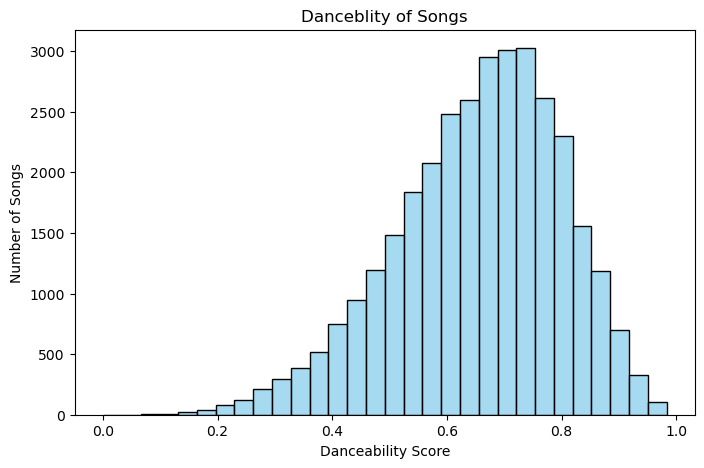

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df_features["danceability"], bins=30, color="skyblue")
plt.title("Danceblity of Songs")
plt.xlabel("Danceability Score")
plt.ylabel("Number of Songs")
plt.show()


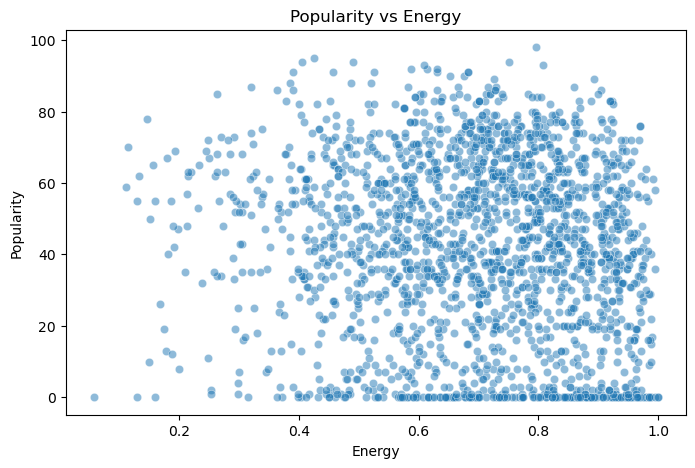

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df.sample(2000), x="energy", y="track_popularity", alpha=0.5)
plt.title("Popularity vs Energy")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()


c:\Users\hp\repositories\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


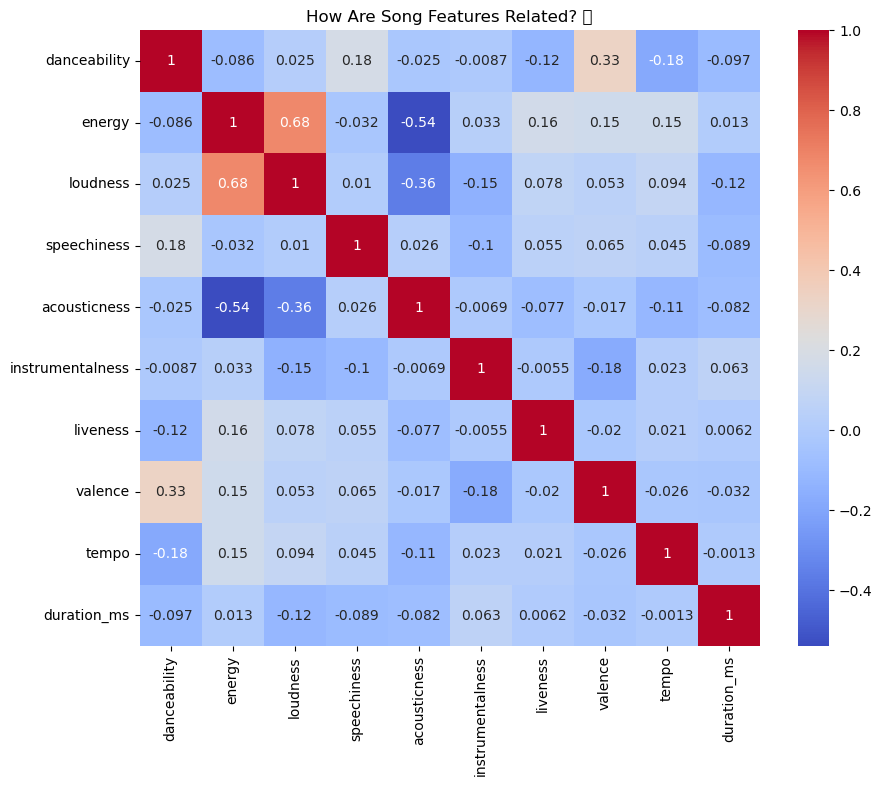

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_features.corr(), annot=True, cmap="coolwarm")
plt.title("How Are Song Features Related? 🔗")
plt.show()


In [22]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)


In [23]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)


In [24]:
# Add cluster labels to the original dataframe
df["Cluster"] = clusters


In [26]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)
reduced


array([[ 1.55008713,  0.65547275],
       [ 1.09248001,  0.89525246],
       [ 1.63010105,  0.61452723],
       ...,
       [ 0.93655697, -0.70945441],
       [ 1.71102436, -1.4116282 ],
       [ 1.76283403, -2.79412135]])

In [28]:
# Add PCA results to dataframe
df["PCA1"] = reduced[:, 0]
df["PCA2"] = reduced[:, 1]


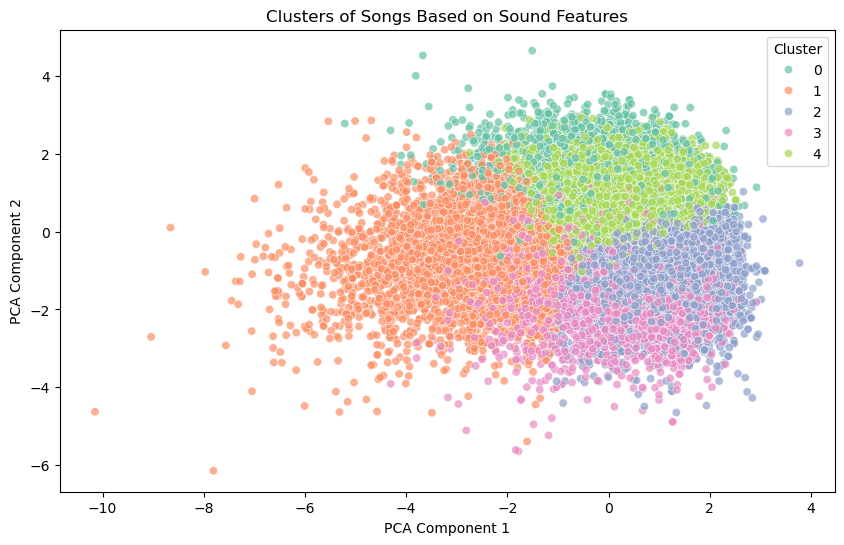

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", alpha=0.7)
plt.title("Clusters of Songs Based on Sound Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
